In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import dateutil.parser
import re

#La commande ci-dessous signifie que la sortie de plusieurs
#commandes dans une cellule sera sortie en une seule fois

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#La commande ci-dessous indique à jupyter d'afficher 
#jusqu'à 80 colonnes, ce qui permet de garder tout visible.

pd.set_option('display.max_columns', 80)
pd.set_option('expand_frame_repr', True)

%matplotlib inline

sns.set_palette("hls")
from sklearn import preprocessing
from sklearn.cluster import KMeans

from scipy import stats as stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
import statsmodels.api as sm

# Analyse exploratoire des données

## Importation du dataset

In [5]:
iris = pd.read_csv('iris.txt')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


On a affiché ici les 4 premiers éléments de notre data set que l'on a nommé : " iris ".

In [6]:
iris.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,class
80,5.5,2.4,3.8,1.1,Iris-versicolor
46,5.1,3.8,1.6,0.2,Iris-setosa
104,6.5,3.0,5.8,2.2,Iris-virginica


Voici 3 lignes aléatoires parmis toutes les données

## Type de variable

In [7]:
# Voici toutes les colonnes
iris.columns.tolist()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

In [8]:
for elem in iris.columns.tolist():
    print(f"dtype('{elem}') = {iris[elem].dtype}")

dtype('sepal_length') = float64
dtype('sepal_width') = float64
dtype('petal_length') = float64
dtype('petal_width') = float64
dtype('class') = object


On voit que les colonnes "sepal_length, sepal_width, petal_length, petal_width" sont de type "float64" et sont donc des valeurs réelles.


La dernière colonne "class" est de type "object" et nous donne l'espèce à laquelle appartient la fleur mesurée. 

## Notre dataset possède-t-il des valeurs manquantes ?

In [9]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

On remarque donc qu'il ne manque aucune valeur dans notre dataset ce qui est très appréciable.

## Conformité

In [10]:
print(f'Il y a {iris.shape[0]} observations et {iris.shape[1]} variables')

Il y a 150 observations et 5 variables


In [11]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


On a donc bien 150 observations par variables pour 4 variables qui sont nos colonnes vues précédemment.

La plage des valeurs semble correcte, en effet on voit que les minimums des mesures de chaques variables sont positifs.

In [12]:
categorical = iris.dtypes[iris.dtypes == "object"].index
iris[categorical].describe()

,class
count,150
unique,3
top,Iris-virginica
freq,50


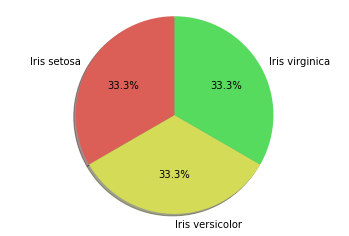

In [13]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = "Iris setosa", "Iris versicolor", "Iris virginica"
len_iris_setosa = len(iris[iris["class"] == "Iris-setosa"])
len_iris_versicolor = len(iris[iris["class"] == "Iris-versicolor"])
len_iris_virginica = len(iris[iris["class"] == "Iris-virginica"])
sizes = [len_iris_setosa/150, len_iris_versicolor/150, len_iris_virginica/150]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show();

La dernière variable ( "class" ) qui est de type "object" nous indique qu'il y a 3 espèces différentes d'iris. 

Ici nos données sont équitablement réparties, il y a 50 observations par espèces.

## Scatter plot

In [14]:
numeric_vars = iris.select_dtypes(include=[np.number]).columns.tolist()
for variable in numeric_vars:
    print(variable)

sepal_length
sepal_width
petal_length
petal_width


Nos variables numériques sont donc : sepal_length, sepal_width, petal_length et petal_width

Pour commencer, regardons s’il existe une relation entre petal_length et petal_width. L'intuition suggère que les pétales les plus longues sont aussi les plus larges. 

Si c'est vrai, nous le verrons dans le nuage de points.

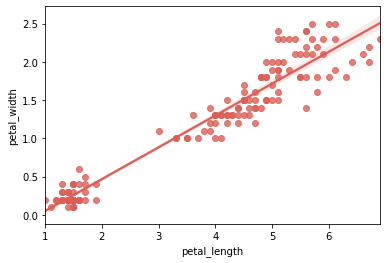

In [15]:
ax = sns.regplot(x='petal_length', y='petal_width', data=iris)

On voit très clairement une relation linéaire entre la longueur et la largeur des pétales.

### Explorons une autre relation

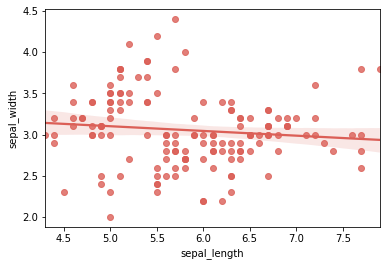

In [16]:
ax = sns.regplot(x='sepal_length', y='sepal_width', data=iris)

On remarque qu'il n'y a pas vraiment de relation entre la longueur du sépale et sa largeur

## Matrice de dispersion

Lorsque nous avons beaucoup de variables continues, nous pouvons les passer en revue une par
une pour voir la relation où nous pouvons utiliser une matrice de nuage de points ! Celle-ci crée
un diagramme de dispersion entre chaque combinaison de variables dans une liste.


Une autre qualité intéressante de la matrice de dispersion est que les diagonales donnent un his-
togramme de la variable en question.

In [17]:
columns = ['petal_length','petal_width','class']
num_df = iris[columns]

In [18]:
num_df

,petal_length,petal_width,class
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa
...,...,...,...
145,5.2,2.3,Iris-virginica
146,5.0,1.9,Iris-virginica
147,5.2,2.0,Iris-virginica
148,5.4,2.3,Iris-virginica


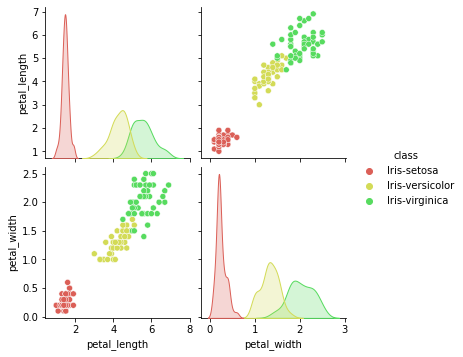

In [19]:
# Create the scatter plot and let's color the data point by their status.
sns.pairplot(num_df,hue='class');

## Histogramme

C:\Users\vince\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


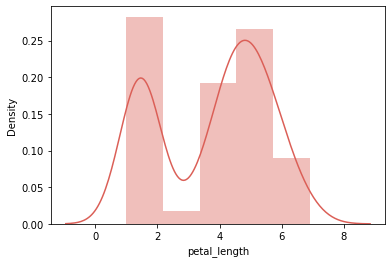

In [20]:
sns.distplot(iris['petal_length']);

C:\Users\vince\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


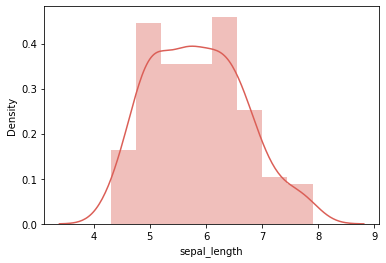

In [21]:
sns.distplot(iris['sepal_length'].dropna(axis = 0));

C:\Users\vince\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


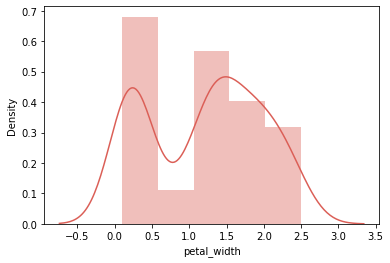

In [22]:
sns.distplot(iris['petal_width'].dropna(axis = 0));

C:\Users\vince\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


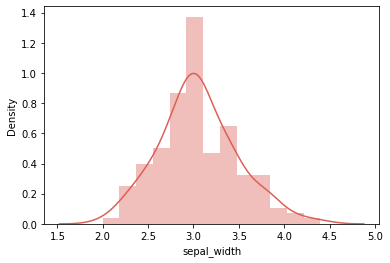

In [23]:
sns.distplot(iris['sepal_width'].dropna(axis = 0));

## Bar Plot

Les diagrammes en bâtons sont utiles pour comprendre comment les variables catégorielles sont
différentes par rapport à une variable continue

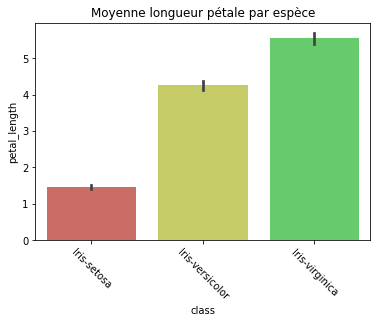

In [24]:
p = sns.barplot(x='class', y ='petal_length', data=iris, estimator=np.mean);
p.set(title='Moyenne longueur pétale par espèce')
p.set_xticklabels(p.get_xticklabels(), rotation=-45);

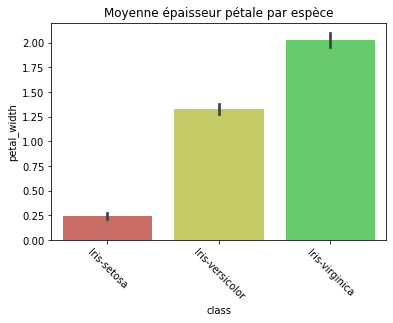

In [25]:
p = sns.barplot(x='class', y ='petal_width', data=iris, estimator=np.mean);
p.set(title='Moyenne épaisseur pétale par espèce')
p.set_xticklabels(p.get_xticklabels(), rotation=-45);

On remarque que les iris virginica ont en moyenne des plus grands et larges pétales que les 2 autres espèces.

L'iris setosa possède quant à elle les plus petis pétales.

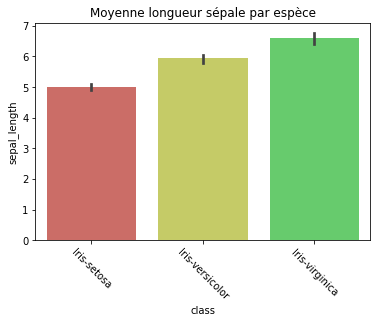

In [26]:
p = sns.barplot(x='class', y ='sepal_length', data=iris, estimator=np.mean);
p.set(title='Moyenne longueur sépale par espèce')
p.set_xticklabels(p.get_xticklabels(), rotation=-45);

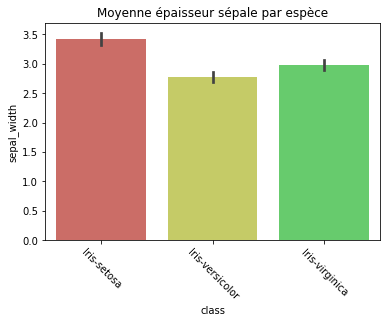

In [27]:
p = sns.barplot(x='class', y ='sepal_width', data=iris, estimator=np.mean);
p.set(title='Moyenne épaisseur sépale par espèce')
p.set_xticklabels(p.get_xticklabels(), rotation=-45);

Ici il est intéressant de noter que les iris virginica possèdent les sépale les plus longs et les iris setosa les plus courts tandis que l'ordre s'inverse quasiment quand on regarde l'épaisseur des sépales.

En effet ici les iris setosa possèdent les sépales les plus larges, et les iris vesicolor les moins larges.

## Mise à l’échelle des caractéristiques des covariables

Nous ne ferons pas directement de la mise à l'échelle sur les données car la façon dont nous le ferons dépend de l'algorithme que nous utiliserons.

Voici les trois techniques les plus courantes de mise à l’échelle des variables : 1. Normalisation 2. Standardisation 3. Transformation logarithmique

La normalisation est le processus de remise à l’échelle des données de 0 à 1. La formule pour cette approche est la suivante :
X_std = (X - Xmin) / (Xmax - Xmin) et X_scaled = X_std * (max - min) + min

### petal_length

In [28]:
iris_mae = iris["petal_length"]

In [29]:
preprocessing.MinMaxScaler()
min_max_scaler = preprocessing.MinMaxScaler()

normalized = min_max_scaler.fit_transform(iris_mae.astype(np.float64).values.reshape(-1,1))[:,0]
print(f"Pre Scaling\tMin: {iris_mae.min()}\tMax: {iris_mae.max()}\tMean: {iris_mae.mean():.3f}")
print(f"Post Scaling\tMin: {np.min(normalized)}\tMax: {np.max(normalized)}\tMean: {np.mean(normalized):.3f}")

MinMaxScaler()

Pre Scaling	Min: 1.0	Max: 6.9	Mean: 3.759
Post Scaling	Min: 0.0	Max: 1.0	Mean: 0.468


La standardisation suppose que les données sont normalement distribuées (c’est-à-dire gaussi-
ennes) et qu’elles sont mises à l’échelle de manière à avoir une moyenne nulle et une variance
unitaire. Voici la formule : (X - Xmoyenne) / Xvariance

In [30]:
standardized = preprocessing.scale(iris_mae.astype(np.float64))
print(f"Post Scaling\tMin: {np.min(standardized):.3f}\t Max: {np.max(standardized):.3f}\tMean: {np.mean(standardized):.3f}")

Post Scaling	Min: -1.569	 Max: 1.786	Mean: 0.000


D'après ces valeurs, il apparaît que nos données ont une distribution symétrique et n'ont donc pas besoin d'une transformation logarithmique

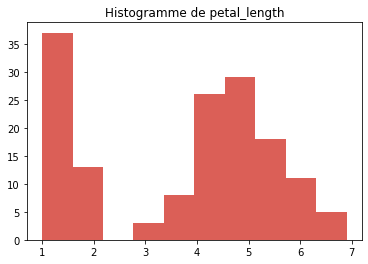

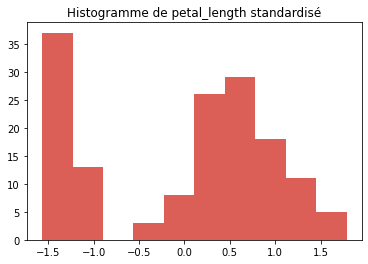

In [31]:
plt.hist(iris_mae)
plt.title("Histogramme de petal_length")
plt.show()
plt.hist(standardized)
plt.title("Histogramme de petal_length standardisé")
plt.show();

On remarque sur ces 2 histogrammes qu'en effet les données étaient déjà réparties selon un loi gaussienne.

De plus on voir que les données sont scindées en 2 parties, cela vient de la différence de longueur des pétales entre les classes comme vu dans la matrice de dispersion, ce sont les iris setosa.

A droite les iris versicolor et virginica sont réparties normalement.

### sepal_length

In [32]:
iris_mae = iris["sepal_length"]

In [33]:
preprocessing.MinMaxScaler()
min_max_scaler = preprocessing.MinMaxScaler()

normalized = min_max_scaler.fit_transform(iris_mae.astype(np.float64).values.reshape(-1,1))[:,0]
print(f"Pre Scaling\tMin: {iris_mae.min()}\tMax: {iris_mae.max()}\tMean: {iris_mae.mean():.3f}")
print(f"Post Scaling\tMin: {np.min(normalized)}\tMax: {np.max(normalized)}\tMean: {np.mean(normalized):.3f}")

MinMaxScaler()

Pre Scaling	Min: 4.3	Max: 7.9	Mean: 5.843
Post Scaling	Min: 0.0	Max: 1.0	Mean: 0.429


In [34]:
standardized = preprocessing.scale(iris_mae.astype(np.float64))
print(f"Post Scaling\tMin: {np.min(standardized):.3f}\t Max: {np.max(standardized):.3f}\tMean: {np.mean(standardized):.3f}")

Post Scaling	Min: -1.870	 Max: 2.492	Mean: -0.000


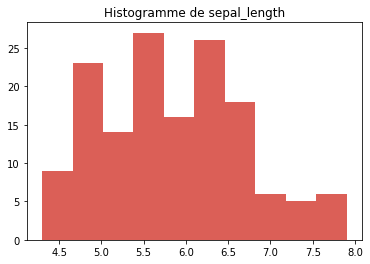

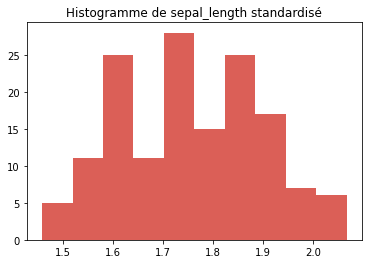

In [35]:
plt.hist(iris_mae)
plt.title("Histogramme de sepal_length")
plt.show()
plt.hist(np.log(iris_mae))
plt.title("Histogramme de sepal_length standardisé")
plt.show();

### petal_width

In [36]:
iris_mae = iris['petal_width']

In [37]:
preprocessing.MinMaxScaler()
min_max_scaler = preprocessing.MinMaxScaler()

normalized = min_max_scaler.fit_transform(iris_mae.astype(np.float64).values.reshape(-1,1))[:,0]
print(f"Pre Scaling\tMin: {iris_mae.min()}\tMax: {iris_mae.max()}\tMean: {iris_mae.mean():.3f}")
print(f"Post Scaling\tMin: {np.min(normalized)}\tMax: {np.max(normalized)}\tMean: {np.mean(normalized):.3f}")

MinMaxScaler()

Pre Scaling	Min: 0.1	Max: 2.5	Mean: 1.199
Post Scaling	Min: 0.0	Max: 1.0	Mean: 0.458


In [38]:
standardized = preprocessing.scale(iris_mae.astype(np.float64))
print(f"Post Scaling\tMin: {np.min(standardized):.3f}\t Max: {np.max(standardized):.3f}\tMean: {np.mean(standardized):.3f}")

Post Scaling	Min: -1.444	 Max: 1.711	Mean: -0.000


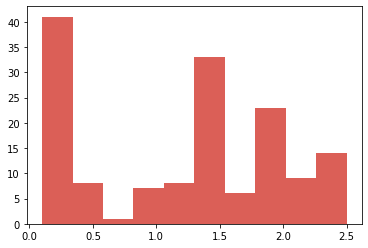

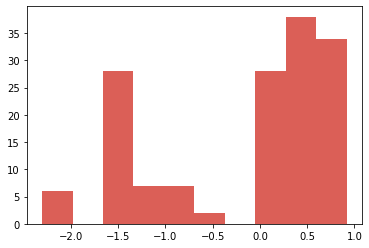

In [39]:
plt.hist(iris_mae)
plt.show()
log_loan_amount = np.log(iris_mae)
plt.hist(log_loan_amount)
plt.show();

In [40]:
preprocessing.MinMaxScaler()
min_max_scaler = preprocessing.MinMaxScaler()
normalized = min_max_scaler.fit_transform(iris['sepal_width'].astype(np.float64).values.reshape(-1,1))[:,0]
print("Pre Scaling\tMin: {0}\t\t Max: {1}\tMean: {2:3f}".format(iris['sepal_width'].min(),iris['sepal_width'].max(),iris['sepal_width'].mean()))
print("Post Scaling\tMin: {0}\t Max: {1:.3f}\tMean: {2:3f}".format(np.min(normalized),np.max(normalized),np.mean(normalized)))

MinMaxScaler()

Pre Scaling	Min: 2.0		 Max: 4.4	Mean: 3.054000
Post Scaling	Min: 0.0	 Max: 1.000	Mean: 0.439167


In [41]:
standardized = preprocessing.scale(iris['sepal_width'].astype(np.float64))
print("Post Scaling\tMin: {0:3f}\t Max: {1:3f}\tMean: {2:3f}".format(np.min(standardized),np.max(standardized),np.mean(standardized)))

Post Scaling	Min: -2.438987	 Max: 3.114684	Mean: -0.000000


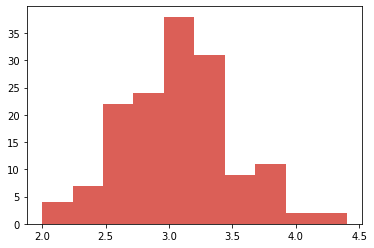

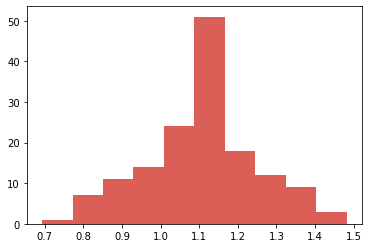

In [42]:
plt.hist(iris['sepal_width'])
plt.show()
log_loan_amount = np.log(iris['sepal_width'])
plt.hist(log_loan_amount)
plt.show();

# Régression linéaire

Nous allons essayer de construire une régression linéaire afin de répondre à une question qu'on pourrait se poser:

Qu'est-ce qui influence la largeur des pétales ? 

## Régression linéaire univariée

Il semblerait logique de penser que plus les pétales sont grands et plus ils sont larges. Afin d'étudier cela nous divisons notre ensemble de données en un ensemble d'entraînement et un ensemble de test. Nous utiliserons notre ensemble d’entraînement pour former notre modèle, et nous utiliserons notre ensemble de test pour sa validation.

In [43]:
pd.options.mode.chained_assignment = None # default='warn'
# Define our dependent variable
y_column = 'petal_width'
y = iris[y_column]
# Define our independent variables
x_columns = ['petal_length']
X = iris[x_columns]
# Add an intercept term to the independent variables. This is needed in order to 
#include the constant term from
# linear regression equation.
X['intercept'] = 1
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [44]:
model = sm.OLS(endog=y_train, exog=X_train)
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1483.
Date:                Sun, 16 Jan 2022   Prob (F-statistic):           1.18e-68
Time:                        11:45:18   Log-Likelihood:                 20.647
No. Observations:                 120   AIC:                            -37.29
Df Residuals:                     118   BIC:                            -31.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
petal_length     0.4141      0.011     38.504   

### Interprétation du modèle

Notre équation est représenté comme ceci:

predicted_petal_width = intercept + coef * petal_length

In [45]:
model_fit.params.intercept

-0.3609364607144496

Cette valeur de l'intercept nous indique l'ordonnée à l'origine de notre modèle, en 0 l'équation vaut intercept

In [46]:
model_fit.params.petal_length

0.41406746095625746

Cette valeur de petal_length nous donne le coefficient directeur de la droite, on voit qu'il vaut 0.414 donc pour une augmentation de 1 de la longueur du pétale sa largeur augmente de 0.414.

La relation linéaire entre la longueur du pétale et sa largeur est alors :

predicted_petal_width = -0.3609 + petal_length * 0.4141

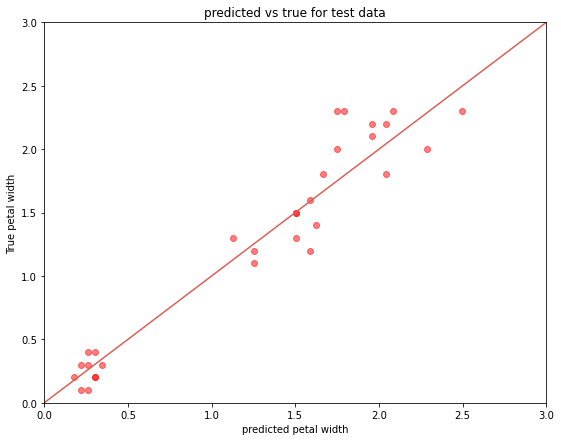

In [47]:
y_pred_test = model_fit.predict(X_test)
plt.figure(figsize=(9,7))
plt.scatter(y_pred_test, y_test, alpha=0.5, c='r')
xx = np.linspace(0,3,10)
plt.plot(xx,xx)
plt.title('predicted vs true for test data')
plt.xlabel('predicted petal width')
plt.ylabel('True petal width')
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,3])
plt.show();

Ici on place les valeurs prédites par le modèle en fonction des vraies valeurs. On voit qu'il y a une relation linéaire qui se forme, ce qui nous conforte dans le fait que notre modèle fonctionne.

Afin de créer ce modèle on a séparé notre jeu de données en deux ensemble: un ensemble d'entraînement (train) pour former la régression et un ensemble test pour valider le modèle.

On vérifie que notre modèle est bien approprié pour pouvoir interpréter les coefficients obtenus grâce aux hypothèses suivantes:

1) On a vu plus haut qu'il existe une relation linéaire entre petal_width et petal_length

2) Le nombre Prob(JB) est supérieur à 0.05, on en déduit que nos données sont normalement distribuées.

3) Le nombre de condition est inférieur à 30, ce qui signifie que l'on n'a pas de problème de multcolinéarité

4) Le nombre de Durbin-Watson est proche de 2, on en déduit l'absence d'autocorrélation

5) Le nombre Prob(Omnibus) est supérieur à 0.05, on en déduit que notre modèle est homoscédastique.

Les hypothèses étant vérifiées, on en déduit que notre modèle est approprié.

### Evaluation du modèle

In [48]:
linear = LinearRegression(fit_intercept=False)
r2_cross_val_score = cross_val_score(linear, X_train, y_train, cv = 5).mean()
print('cross validation R2: {}'.format(r2_cross_val_score))

cross validation R2: 0.9212637338074785


La valeur du R2 de validation croisée est proche de la valeur d'apprentissage, on en déduit que notre modèle n'est pas en underfiting (sous-ajustement). Cela nous indique que les performance du modèle sont bonnes. On crée ensuite un score MSE (mean square error) et RMSE(root mean square error).

On évalue désormais la performance de notre modèle en effectuant une validation croisée sur notre ensemble train

In [49]:
mse_scorer = make_scorer(mean_squared_error)
mse_cross_val_score = cross_val_score(linear, X_train, y_train,scoring=mse_scorer, cv =5).mean()
print(f'cross validation MSE: {mse_cross_val_score:.6}')
print(f'cross validation RMSE: {np.sqrt(mse_cross_val_score):.4}')

cross validation MSE: 0.0423824
cross validation RMSE: 0.2059


On en déduit que l'erreur moyenne est de 0.2 cm

In [52]:
model2 = linear.fit(X_train, y_train)
print(f'R2 on test data: {model2.score(X_test, y_test):.4}')

R2 on test data: 0.9283


Le R2 sur nos données test est proche de celui de la validation croisée, ce qui signifie que notre modèle n'est pas en overfiting (sur-ajustement).

In [53]:
y_pred_test = model2.predict(X_test)
print(f'root mean squared error on test data: {np.sqrt(mean_squared_error(y_test,y_pred_test)):.4}')

root mean squared error on test data: 0.2135


Ici on calcule la RMSE sur nos données test. La valeur obtenue est proche de celle de la validation croisée. Notre modèle fonctionne donc bien sur des données non vues.

## Régression linéaire multivariée

La première régression que nous avons construite était une régression univariée, ce qui signifie que nous n’avions qu’une seule variable indépendante, qui dans ce cas était le " petal_length ". Notre régression linéaire a démontré qu’en général, plus le pétale est long, plus il est large.

Utilisons maintenant les autres variables de nos données et voyons lesquelles ont une forte relation linéaire avec la largeur du pétale.

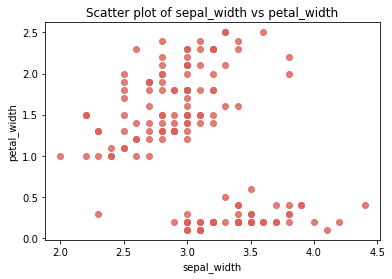

In [54]:
# plot petal_width vs sepal_width
ax = sns.regplot(x='sepal_width', y='petal_width', data=iris, fit_reg=False)
ax.set_title('Scatter plot of sepal_width vs petal_width');

Il n'y a pas de ralation claire entre la largeur du sépale et celle du pétale. En tout cas elle ne semble pas être linéaire.

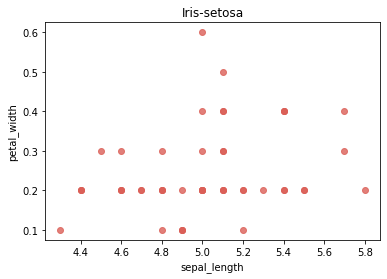

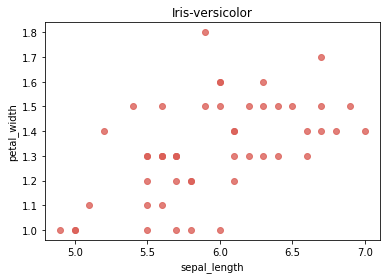

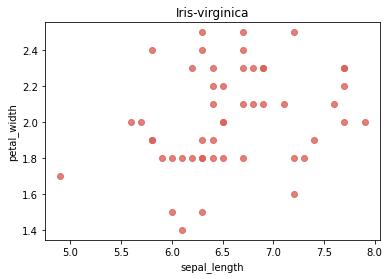

In [55]:
for species in iris['class'].unique():
    ax = sns.regplot(x='sepal_length', y='petal_width',
                 data=iris[iris['class']==species], fit_reg=False)
    ax.set_title(species)
    plt.show()
plt.show();

La relation linéaire entre la longueur du sépale et le largeur du pétale est le plus forte pour les espèces virginica et versicolor.

<AxesSubplot:>

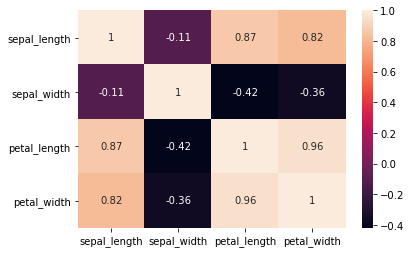

In [56]:
correlation_matrix = iris.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

Sur cette matrice de corrélation on voit bien que petal_width et petal_length sont fortement corrélés, ce qui explique l'exactitude de notre modèle linéaire précédent.

Essayons à présent de prédire la largeur du pétale en fonction à nouveau sa longueur mais également de la largeur du sépale. ( Nous avons choisis cette variable en écartant volontairement la longueur du sépale car on voit qu'elle est fortement corrélée avec la longueur du pétale dont nous prenons déjà compte).

In [57]:
# Define our dependent variable
y_column = 'petal_width'
y = iris[y_column]

# Define our independent variables
x_columns = ['petal_length', 'sepal_width']
X = iris[x_columns]

# Add an intercept term to the independent variables. This is needed in order to␣
#include the constant term from linear regression equation.
X['cnst'] = 1

# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

model2 = sm.OLS(endog = y_train,exog = X_train).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     767.5
Date:                Sun, 16 Jan 2022   Prob (F-statistic):           5.44e-68
Time:                        11:46:42   Log-Likelihood:                 23.055
No. Observations:                 120   AIC:                            -40.11
Df Residuals:                     117   BIC:                            -31.75
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
petal_length     0.4249      0.012     36.380   

L'ajout de la variable sepal_width a améliorer notre modèle ( le R2 ajusté est passé de 0.926 à 0.928 ). En revanche la p-valeur pour le coefficient sepal_width est de 0.031 ce qui est supérieur à 0.005.

Vérifions certaines des hypothèses de régression linéaire que nous avons abordées plus haut pour
nous assurer que nous pouvons interpréter avec confiance les coefficients des modèles comme
ci-dessus.

Pour faire cela rapidement, nous utiliserons les statistiques données dans le tableau récapitulatif, comme précédemment:

1) Normalité: Le nombre de Prob(JB) est supérieur à 0.05 ce qui signifie que nous ne rejetons pas l'hypothèse nulle selon laquelle les données sont normalement distribuées. HYPOTHÈSE VÉRIFIÉE

2) Multicolinéarité: Le nombre de conditions est inférieur à 30, ce qui signifie que nous n'avons pas de problème de multicollinéarité dans le modèle. HYPOTHÈSE VÉRIFIÉE 

3) Autocorrélation: Le nombre de Durbin-Watson est approximativement 2 donc pas d’autocorrélation. HYPOTHÈSE VÉRIFIÉE.

4) Homoscédasticité: Le nombre de Prob(Omnibus) est supérieur à 0,05, ce qui signifie que ne rejetons pas l’hypothèse nulle selon laquelle les résidus sont normalement distribués. HYPOTHÈSE VÉRIFIÉE.

Toutes les hypothèses sont vérifiées donc le pouvoir prédictif de notre modèle est valide et nous pouvons alors interpréter les coefficients comme nous le souhaitons.

### Evaluation du modèle

In [58]:
# Initialize the model. We set fit_intercept as false as we already have the 
# constant included in our data.
linear = LinearRegression(fit_intercept=False)
# Use the cross_val_sore function to calculate the r2 cross validation
r2_cross_val_score = cross_val_score(linear, X_train, y_train, cv = 5).mean()
# Results!
print('cross validation R2: {}'.format(r2_cross_val_score))

cross validation R2: 0.9237729243415107


Le score R2 de validation croisée est très similaire au R2 d’apprentissage, ce qui nous donne con-
fiance dans les performances du modèle sur les données de test non vues !

In [59]:
# make MSE scorer
mse_scorer = make_scorer(mean_squared_error)
# use the cross_val_score function to calculate to the cross validated MSE
mse_cross_val_score = cross_val_score(linear, X_train, y_train,scoring=mse_scorer, cv =5).mean()
# Results!
print(f'cross validation MSE: {mse_cross_val_score:.6}')
print(f'cross validation RMSE: {np.sqrt(mse_cross_val_score):.4}')

cross validation MSE: 0.0410367
cross validation RMSE: 0.2026


Cela suggère que l'erreur moyenne de notre modèle est de 0.2 cm.

Maintenant, voyons comment il se comporte sur nos données de test.

In [60]:
#Train the Model
model2 = linear.fit(X_train, y_train)
#Get R2 for test data
print(f'R2 on test data: {model2.score(X_test, y_test):.4}')

R2 on test data: 0.931


Excellent ! C’est comparable à la validation croisée R2, donc nous savons que nous ne sommes pas en train de sur-ajuster.

In [61]:
# Get predictions for the test data
y_pred_test = model2.predict(X_test)
print(f'root mean squared error on test data: {np.sqrt(mean_squared_error(y_test,y_pred_test)):.4}')

root mean squared error on test data: 0.2095


Encore une fois, ce résultat est comparable à celui de la validation croisée, ce qui nous permet de penser que le modèle fonctionne bien sur les données non vues.

Enfin, visualisons les performances de notre modèle sur les données de test.

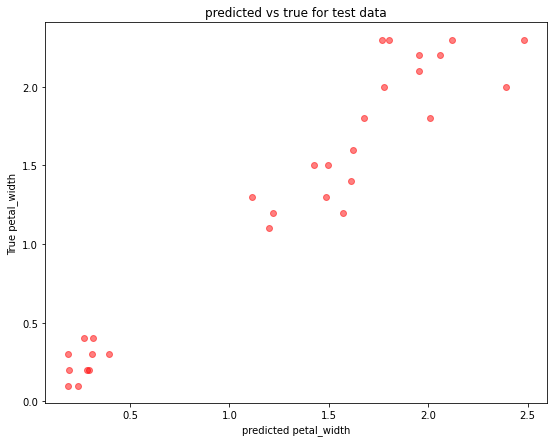

In [62]:
plt.figure(figsize=(9,7))
plt.scatter(y_pred_test, y_test, alpha=0.5, c='r')
plt.title('predicted vs true for test data')
plt.xlabel('predicted petal_width')
plt.ylabel('True petal_width')
plt.show();

# Clustering k-means

Dans cette partie, on cherche à cherche à répondre, à partir de la méthode de clustering k-means, à la question suivante:

Peut-on déterminer l'espèce des Iris en fonction de la longueur et de la largeur de leur pétale ?

In [63]:
for i in range(150):
    if iris['class'][i] == 'Iris-setosa':
        iris['class'][i] = 1
    elif iris['class'][i] == 'Iris-versicolor':
        iris['class'][i] = 2
    else:
        iris['class'][i] = 3

Pour pouvoir appliquer la méthode des k-means, on doit numéroter les class.

In [64]:
# Let's fit a different model for each value of k
k_values = range(1, 10)

# Fit a model for each value of k
k_mean_models = [KMeans(n_clusters=i) for i in k_values]

# See how the scores change
scores = [-k_mean_models[i].fit(iris).score(iris)
          for i, model in enumerate(k_mean_models)]

C:\Users\vince\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


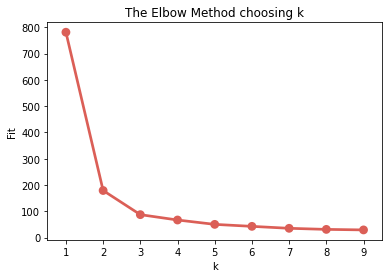

In [65]:
# Let's plot the effect k on the clustering
ax = sns.pointplot(x=list(k_values),
                   y=scores);
ax.set(xlabel='k',
       ylabel='Fit',
       title='The Elbow Method choosing k');

Ici, on trace un coude pour voir quel serait le nombre optimal de clusters. On remarque que le coude se forme pour la valeur 3. On choisit donc de diviser les données en 3 clusters ( ce que nous pouvions deviner à l'avance car nous avons 3 espèces différentes ).

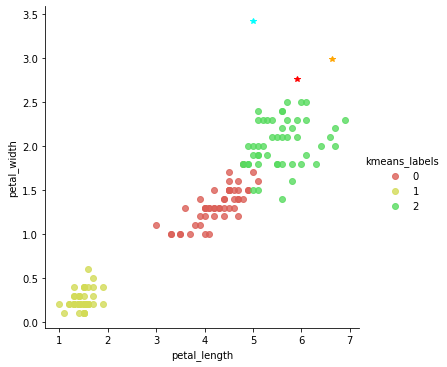

In [71]:
kmeans = KMeans(n_clusters=3) # On crée 3 clusters
kmeans.fit(iris);

iris['kmeans_labels'] = kmeans.labels_

kmeans_plot = sns.lmplot(x='petal_length', 
                       y='petal_width', 
                       data=iris, 
                       fit_reg=False,        
                       hue="kmeans_labels",  
                       legend=True);

kmeans_plot.ax.plot(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], color='red', marker='*');

kmeans_plot.ax.plot(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], color='cyan', marker='*');

kmeans_plot.ax.plot(kmeans.cluster_centers_[2][0], kmeans.cluster_centers_[2][1], color='orange', marker='*');

Ici on applique l'algorithme des k-means. On reamarque qu'un cluster est formé pour les petites longueuers et largeurs de pétales, ce qui correspond à la classe Iris-setosa. En revanche les deux autres clusters formés ne séparent pas les deux autres classes. En effet certaines valeurs de longueurs et de largeurs de ces deux classes sont proches. De ce fait certaines données d'une même classe se placent dans des clusters différents en fonction de leur distance au centre du cluster.